<a href="https://colab.research.google.com/github/harshithamadarapu/Team16_Hinglish-Auto-suggestions/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [16]:
# loading the dataset
df = pd.read_csv('/content/nlptrain.csv')

In [17]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_phrases'] = df['phrases'].apply(lambda x: clean_text(str(x)))

df.to_csv('/content/cleaned_data.csv', index=False)
print("Preprocessing complete and data saved as 'cleaned_data.csv'.")

Preprocessing complete and data saved as 'cleaned_data.csv'.


In [18]:
# normalizing the data by converting to lowercase
df['normalized_phrases'] = df['cleaned_phrases'].apply(lambda x: x.lower())

df.to_csv('/content/normalized_data.csv', index=False)
print("Normalization complete and data saved as 'normalized_data.csv'.")


Normalization complete and data saved as 'normalized_data.csv'.


In [19]:
# tokenize
df['tokenized_phrases'] = df['normalized_phrases'].apply(lambda x: x.split())

df.to_csv('/content/tokenized_data.csv', index=False)
print("Tokenization complete and data saved as 'tokenized_data.csv'.")

Tokenization complete and data saved as 'tokenized_data.csv'.


In [20]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract all words from the tokenized dataset
all_tokens = [token for sublist in df['tokenized_phrases'] for token in sublist]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Print the most common words
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words:
ke: 81318
liye: 55985
hai: 55913
ko: 55262
kya: 38535
me: 32989
kare: 28297
mujhe: 23965
alarm: 23196
mere: 20463


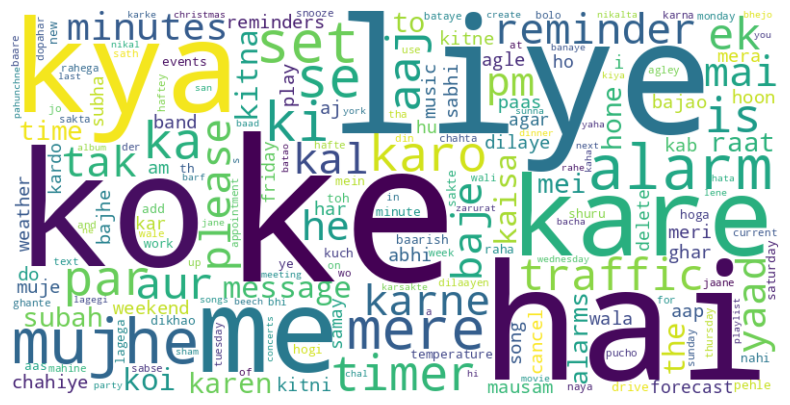

In [21]:
# Generate a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

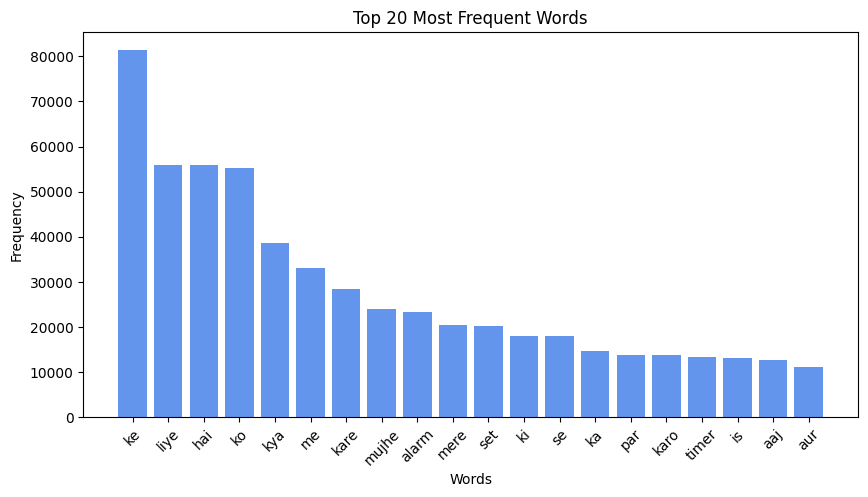

In [22]:
# 20 most common words
top_n = 20
most_common_n = word_freq.most_common(top_n)

# word frequencies plotting
words, counts = zip(*most_common_n)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='cornflowerblue')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
unique_words = set(all_tokens)

# no.of unique words
print(f"Total number of unique words: {len(unique_words)}")

Total number of unique words: 38356
